<a href="https://colab.research.google.com/github/ethanpnguyen/ds4e/blob/main/notebooks/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

Can you segment customers by purchasing behavior?

## Initialize

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [11]:
dfRet = pd.read_csv('/content/retail_transactions.csv', encoding='ISO-8859-1')
dfRet.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Prepare Data

In [12]:
# Calculate row total amount

dfRet['total'] = dfRet['Quantity']*dfRet['UnitPrice']
dfRet.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
# Aggregate by customer id

dfRtc = dfRet.groupby('CustomerID').agg({'InvoiceNo':'nunique','total':'sum'})

In [15]:
dfRtc

,InvoiceNo,total
CustomerID,,
12346.0,2,0.00
12347.0,7,4310.00
12348.0,4,1797.24
12349.0,1,1757.55
12350.0,1,334.40
...,...,...
18280.0,1,180.60
18281.0,1,80.82
18282.0,3,176.60


Text(0, 0.5, 'amt_total')

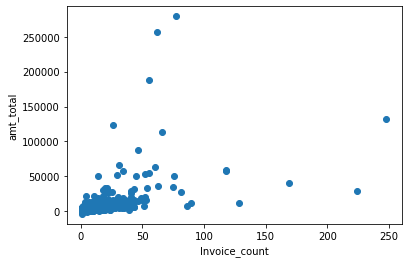

In [17]:
# Scatterplot

plt.scatter(dfRtc['InvoiceNo'], dfRtc['total'])
plt.xlabel('Invoice_count')
plt.ylabel('amt_total')

## Build K-Means Model

In [19]:
from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=2, random_state=0)
mdlKmcRtc.fit(dfRtc)
mdlKmcRtc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'K-Means clustering')

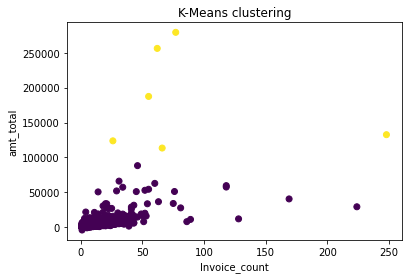

In [20]:
plt.scatter(dfRtc['InvoiceNo'], dfRtc['total'], c=mdlKmcRtc.labels_)
plt.xlabel('Invoice_count')
plt.ylabel('amt_total')
plt.title('K-Means clustering')

In [21]:
from sklearn.metrics import silhouette_score

silhouette_score(dfRtc, mdlKmcRtc.labels_)

0.9864583027149687

In [22]:
# Function for K-means clustering

def cluster_kmeans(X, k):
  mdlKmcRtc = KMeans(n_clusters=k, random_state=0)
  mdlKmcRtc.fit(dfRtc)
  kmeans_labels = mdlKmcRtc.labels_
  kmeans_sil_score = silhouette_score(X, kmeans_labels)
  return (kmeans_labels, kmeans_sil_score)

In [25]:
for k in [2,3,4,5,6]:
  kmeans_labels, kmeans_sil_score = cluster_kmeans(dfRtc, k)
  print(f'k: {k}\tsil_score: {kmeans_sil_score}')

k: 2	sil_score: 0.9864583027149687
k: 3	sil_score: 0.9634589407532966
k: 4	sil_score: 0.8857613703364906
k: 5	sil_score: 0.8184919183405325
k: 6	sil_score: 0.7771160904582106
